In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay)



In [2]:
df = pd.read_csv('tomato irrigation dataset.csv')

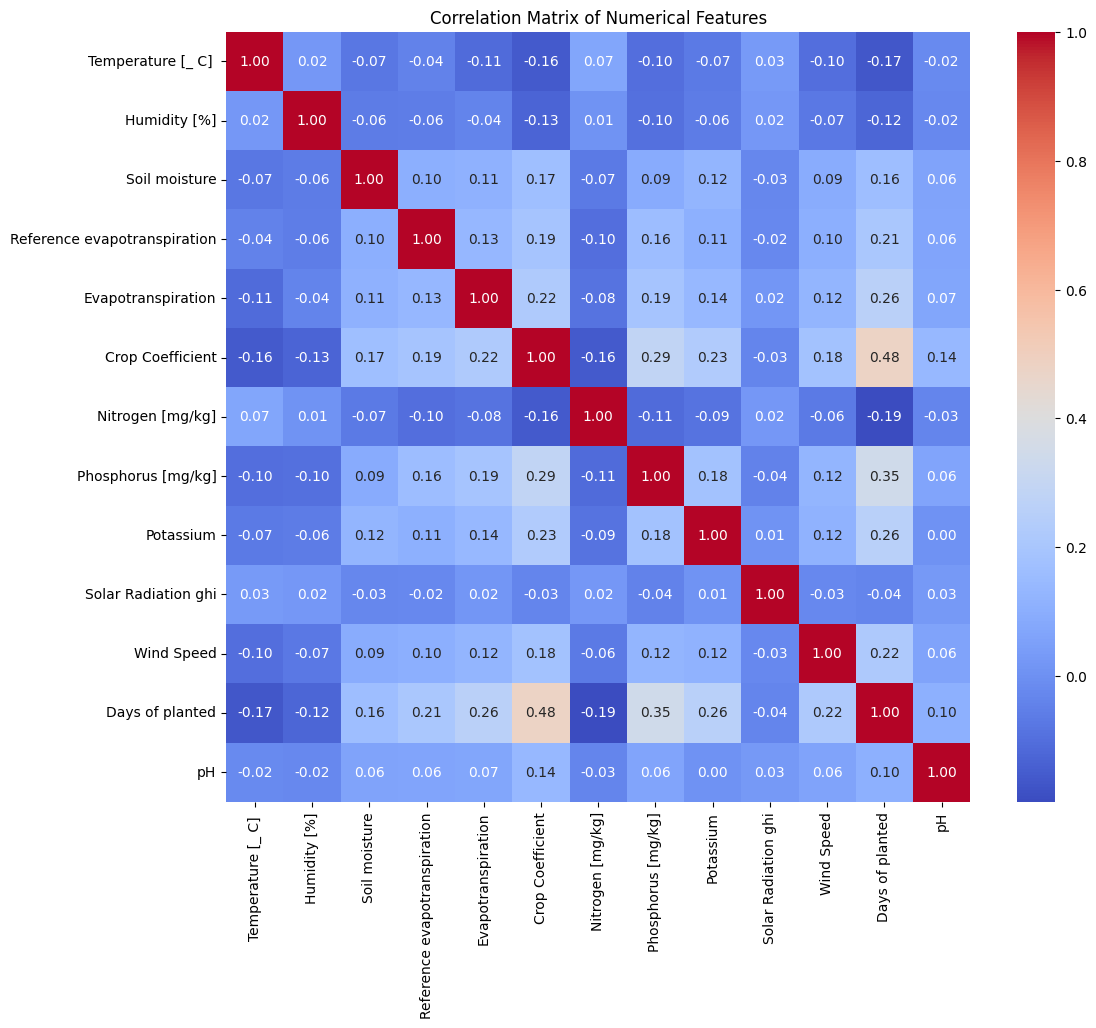

In [3]:
# Drop the 'Crop Coefficient stage' column
df_numeric = df.drop('Crop Coefficient stage', axis=1)

plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [4]:
# print("\nCategorical Feature Exploration - 'Crop Coefficient stage':")
# print(df['Crop Coefficient stage'].value_counts())

In [5]:
# # Identify all unique categories in 'Crop Coefficient stage'
# unique_categories = sorted(df['Crop Coefficient stage'].unique())
# print(f"Unique categories: {unique_categories}")

# # Use all unique categories for ordinal encoding
# ordinal_encoder = OrdinalEncoder(categories=[unique_categories])
# df['Crop Coefficient stage'] = ordinal_encoder.fit_transform(df[['Crop Coefficient stage']])

# df.drop_duplicates(inplace=True)

In [6]:
numerical_features = ['Temperature [_ C] ', 'Humidity [%]', 'Soil moisture',
                      'Reference evapotranspiration', 'Evapotranspiration', 'Crop Coefficient',
                      'Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium',
                      'Solar Radiation ghi', 'Wind Speed', 'Days of planted', 'pH']
X = df[numerical_features]

# Create interaction features (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)


# Define a threshold for soil moisture
threshold = 400  # Example threshold, adjust as needed based on the distribution
y = (df['Soil moisture'] >= threshold).astype(int)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2100, 104), y_train shape: (2100,)
X_val shape: (450, 104), y_val shape: (450,)
X_test shape: (450, 104), y_test shape: (450,)


In [7]:
params = {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

# Initialize and train the model with best hyperparameters
final_model = LogisticRegression(max_iter=1000, **params)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

Accuracy: 0.9977777777777778
Precision: 1.0
Recall: 0.9957805907172996
F1-score: 0.9978858350951374
AUC-ROC: 0.9978902953586498


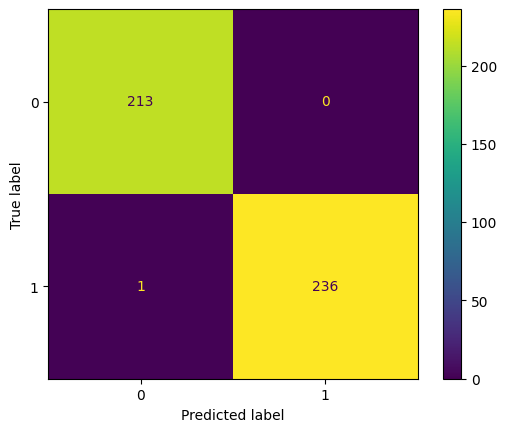

In [8]:
# Predict on the test set
y_pred_final = final_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
auc_roc = roc_auc_score(y_test, y_pred_final)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()